In [ ]:
'''Sentiment Analysis of mobile reviews'''


'Sentiment Analysis of mobile reviews'

In [ ]:
#amazon_unlocked mobile database
#import important libraries
import numpy as np  #numerical 
import pandas as pd  #data preprocessing

In [ ]:
#Load the mobile reviews data
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
df = df.sample(frac=0.1, random_state=10)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
49185,"Apple iPhone 5s AT&T Cellphone, 16GB, Silver",Apple,139.95,1.0,"The phone I got was highly used, many dinks on...",0.0
105035,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,5.0,No comment,0.0
150797,BLU Studio C Super Camera -Unlocked Smartphone...,BLU,99.00,5.0,Great phone! second time I've purchased this m...,0.0
45337,Apple iPhone 5s 32GB (Silver) - Verizon Wireless,Apple,209.00,5.0,Love my phone.,0.0
35862,Apple iPhone 5c 8GB Unlocked GSM Smartphone - ...,Apple,115.00,5.0,Love da fone,NaN


In [ ]:
#Drop the missing values.
df.dropna(inplace=True)

#remove any neutral rating equals to 3.
df = df[df['Rating']!=3]

#Encode 4 star and 5 star as positively rated 1.
#Encode 1 star and 2 star as poorely rated 0.
df['Positively Rated'] = np.where(df['Rating']>3,1,0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
49185,"Apple iPhone 5s AT&T Cellphone, 16GB, Silver",Apple,139.95,1.0,"The phone I got was highly used, many dinks on...",0.0,0
105035,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,5.0,No comment,0.0,1
150797,BLU Studio C Super Camera -Unlocked Smartphone...,BLU,99.00,5.0,Great phone! second time I've purchased this m...,0.0,1
45337,Apple iPhone 5s 32GB (Silver) - Verizon Wireless,Apple,209.00,5.0,Love my phone.,0.0,1
168537,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,4.0,Good,0.0,1
23459,"Apple iPhone 5, White 16GB (GSM Unlocked)",Apple,225.00,1.0,The phone had a passcode. I took it an Apple s...,0.0,0
42671,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,1.0,I requested a factory unlocked iphone. I recei...,0.0,0
122098,BLU Jenny II T177 Unlocked GSM Dual-SIM Cell P...,BLU,18.87,5.0,"Excellent phone... Little, comfortable. Its a ...",0.0,1
107538,BLU Dash 4.0 D270a Unlocked Dual SIM Phone wit...,CT-Miami LLC,74.50,5.0,Pros:Dual core A5 processor480x800AndroidPRICE...,8.0,1
156248,BLU Studio XL Android Smartphone - GSM Unlocke...,BLU,99.99,5.0,The phone was more than I expected. Huge scree...,4.0,1


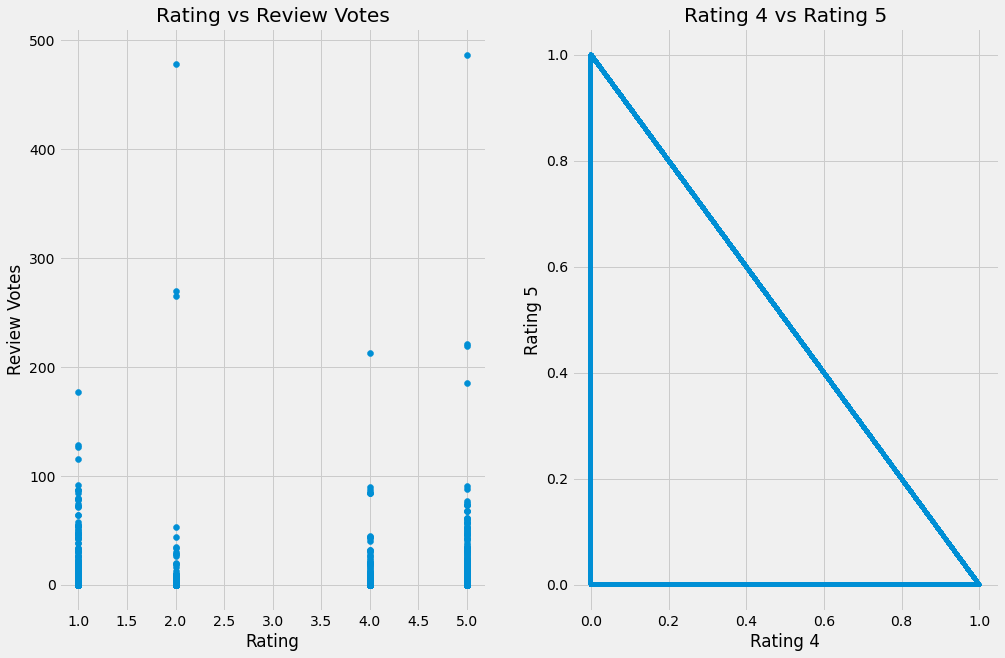

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
fig,(ax0,ax1) = plt.subplots(nrows=1,
                            ncols=2,
                            figsize = (15,10))
ax0.scatter(df['Rating'],df['Review Votes'])
ax0.set(title='Rating vs Review Votes',
       xlabel='Rating',
       ylabel='Review Votes')
ax1.plot(df['Rating']==4,df['Rating']==5)
ax1.set(title='Rating 4 vs Rating 5',
       xlabel='Rating 4',
       ylabel='Rating 5');

In [ ]:
# most ratings are positive
df['Positively Rated'].mean()

0.7488322229879777

In [ ]:
from sklearn.model_selection import train_test_split

X = df['Reviews']
y = df['Positively Rated']
#spliting data into training and test set.
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
print('X_train first entry:\n',X_train.iloc[0])
print('\nX_train shape',X_train.shape)

X_train first entry:
 Very good

X_train shape (9794,)


In [ ]:
df['Positively Rated'].value_counts()

1    9779
0    3280
Name: Positively Rated, dtype: int64

In [ ]:
'''Count Vectorizer'''

'Count Vectorizer'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#fit the countVectorizer to the training data.
vect = CountVectorizer()
vect.fit(X_train)

#getting every 2000 vocabulay features.
vect.get_feature_names()[::2000]

['00', 'chagre', 'fantastically', 'lucked', 'reasons', 'tidbit']

In [ ]:
len(vect.get_feature_names())

11164

In [ ]:
#transform the document in the training data to a document term matrix.
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<9794x11164 sparse matrix of type '<class 'numpy.int64'>'
	with 229225 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
#train the model.
model = LogisticRegression()
model.fit(X_train_vectorized,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

#predict the transform test document.
predictions = model.predict(vect.transform(X_test))
print('AUC: ',roc_auc_score(y_test,predictions))

AUC:  0.9053858568561657


In [ ]:
#get the feature names as numpy array.
feature_names = np.array(vect.get_feature_names())

#sort the coffecient from the model.
sorted_coef_index = model.coef_[0].argsort()

'''Find the 10 smallest and 10 largest coefficients.
 The 10 largest coefficients are being indexed using [:-11:-1] 
 so the list returned is in order of largest to smallest.'''

print('Smallest Coefficient(Negative reviews): \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coeffiecient(Positive reviews): \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefficient(Negative reviews): 
['garbage' 'worst' 'not' 'poor' 'stopped' 'return' 'volume' 'slow'
 'disappointed' 'died']

Largest Coeffiecient(Positive reviews): 
['excellent' 'excelente' 'perfect' 'love' 'amazing' 'excelent' 'awesome'
 'great' 'loves' 'loved']


In [ ]:
'''TFIDF(Term Frequency-Inverse Document Frequency)'''

'TFIDF(Term Frequency-Inverse Document Frequency)'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

3224

In [ ]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8817489651762592


In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['advantage' 'harder' 'enjoyable' 'usability' 'picky' 'struck'
 'underneath' 'human' 'downgrade' 'direction']

Largest tfidf: 
['fantastic' 'recommended' 'great' 'fine' 'iphone' 'superb' 'super' 'very'
 'disappointing' 'good']


In [ ]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'return' 'disappointed' 'bad' 'stopped' 'worst' 'back' 'slow'
 'work' 'waste']

Largest Coefs: 
['great' 'love' 'excellent' 'perfect' 'good' 'excelente' 'amazing'
 'awesome' 'nice' 'best']


In [ ]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


In [ ]:
'''N-gram'''

'N-gram'

In [ ]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

12661

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.9033325394408787


In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'no good' 'bad' 'garbage' 'junk' 'slow' 'horrible' 'stopped' 'poor'
 'disappointed']

Largest Coefs: 
['excellent' 'excelente' 'perfect' 'great' 'excelent' 'awesome' 'amazing'
 'love' 'not bad' 'no problems']


In [ ]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


In [ ]:
print(model.predict(vect.transform(['best mobile ever',
                                    'but camera is not too good'])))

[1 1]
